<a href="https://colab.research.google.com/github/sjetti5555/GenAi/blob/main/TrafficDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kagglehub
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error


#Loading Dataset

In [5]:
# Download latest version
path = kagglehub.dataset_download("anshtanwar/metro-interstate-traffic-volume")

print("Path to dataset files:", path)
path = kagglehub.dataset_download("anshtanwar/metro-interstate-traffic-volume")

print("Path to dataset files:", path)
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file is None:
    print("No CSV file found in the directory.")
else:
    print(f"Found CSV file: {csv_file}")



100%|██████████| 414k/414k [00:00<00:00, 47.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/anshtanwar/metro-interstate-traffic-volume/versions/4


Path to dataset files: /root/.cache/kagglehub/datasets/anshtanwar/metro-interstate-traffic-volume/versions/4
Found CSV file: /root/.cache/kagglehub/datasets/anshtanwar/metro-interstate-traffic-volume/versions/4/Metro_Interstate_Traffic_Volume.csv


In [6]:
df = pd.read_csv(csv_file, delimiter=',')
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


#DataSet Information

In [33]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

print(df.info())

Number of rows: 48193
Number of columns: 11
<class 'pandas.core.frame.DataFrame'>
Index: 48193 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   traffic_volume  48193 non-null  int64  
 1   holiday         48193 non-null  int64  
 2   temp            48193 non-null  float64
 3   rain_1h         48193 non-null  float64
 4   snow_1h         48193 non-null  float64
 5   clouds_all      48193 non-null  int64  
 6   weather_main    48193 non-null  int64  
 7   day             48193 non-null  int64  
 8   month           48193 non-null  int32  
 9   year            48193 non-null  int32  
 10  hour            48193 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 3.9 MB
None


#Handling Null Values

In [8]:
non_null_holiday = df[df['holiday'].notnull()]
non_null_holiday


,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
126,455,Columbus Day,273.080,0.00,0.0,20,Clouds,few clouds,08-10-2012 00:00
1123,1000,Veterans Day,288.120,0.00,0.0,87,Clear,sky is clear,12-11-2012 00:00
1370,919,Thanksgiving Day,278.540,0.00,0.0,20,Mist,mist,22-11-2012 00:00
2360,803,Christmas Day,264.400,0.00,0.0,90,Clouds,overcast clouds,25-12-2012 00:00
2559,1439,New Years Day,263.490,0.00,0.0,58,Clouds,broken clouds,01-01-2013 00:00
...,...,...,...,...,...,...,...,...,...
44441,1088,Memorial Day,299.487,0.00,0.0,24,Clouds,few clouds,28-05-2018 00:00
45547,1021,Independence Day,297.550,0.00,0.0,1,Mist,mist,04-07-2018 00:00
46936,596,State Fair,289.020,0.00,0.0,1,Clear,sky is clear,23-08-2018 00:00
47330,962,Labor Day,292.430,0.25,0.0,1,Rain,light rain,03-09-2018 00:00


In [9]:
df['holiday'] = df['holiday'].fillna('No Holiday')
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,No Holiday,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,No Holiday,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,No Holiday,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,No Holiday,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,No Holiday,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [10]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Number of null values in '{column}': {null_count}")

Number of null values in 'traffic_volume': 0
Number of null values in 'holiday': 0
Number of null values in 'temp': 0
Number of null values in 'rain_1h': 0
Number of null values in 'snow_1h': 0
Number of null values in 'clouds_all': 0
Number of null values in 'weather_main': 0
Number of null values in 'weather_description': 0
Number of null values in 'date_time': 0


#Feature Extraction

In [11]:
df['date_time']=pd.to_datetime(df['date_time'],format='mixed')
df['day'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['hour'] = df['date_time'].dt.hour
#df['date'] = df['date_time'].dt.date

df.drop('date_time',axis=1,inplace = True)
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day,month,year,hour
0,5545,No Holiday,288.28,0.0,0.0,40,Clouds,scattered clouds,Friday,2,2012,9
1,4516,No Holiday,289.36,0.0,0.0,75,Clouds,broken clouds,Friday,2,2012,10
2,4767,No Holiday,289.58,0.0,0.0,90,Clouds,overcast clouds,Friday,2,2012,11
3,5026,No Holiday,290.13,0.0,0.0,90,Clouds,overcast clouds,Friday,2,2012,12
4,4918,No Holiday,291.14,0.0,0.0,75,Clouds,broken clouds,Friday,2,2012,13


#Data Transformation

In [34]:
df['temp']=df['temp'].apply(lambda x: (x- 273.15) * 9/5 + 32)
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,day,month,year,hour
0,5545,1,-353.0488,0.0,0.0,40,1,0,2,2012,9
1,4516,1,-349.5496,0.0,0.0,75,1,0,2,2012,10
2,4767,1,-348.8368,0.0,0.0,90,1,0,2,2012,11
3,5026,1,-347.0548,0.0,0.0,90,1,0,2,2012,12
4,4918,1,-343.7824,0.0,0.0,75,1,0,2,2012,13


In [13]:
df_year = df.groupby('year')['traffic_volume'].mean()

df_year = df_year.reset_index()

# Now you can plot with Plotly Express, and the x-axis will follow the days_order
fig = px.line(df_year, x='year', y='traffic_volume', title='Average Traffic Volume based on Year')

# Customize the plot
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Traffic Volume',
    xaxis_tickmode='array',  # Use array mode for ticks
    xaxis_tickvals=list(range(2012, 2018)),  # Set the tick values from 2012 to 2018
)
fig.show()

In [14]:
# Define the order for the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by 'day' and calculate the mean of 'traffic_volume'
df_day = df.groupby('day')['traffic_volume'].mean()

# Reset the index to make 'day' a column
df_day = df_day.reset_index()

# Convert the 'day' column to a categorical type with the specified order
df_day['day'] = pd.Categorical(df_day['day'], categories=days_order, ordered=True)

# Sort the DataFrame by 'day' to ensure it's in the correct order
df_day = df_day.sort_values('day')

# Now you can plot with Plotly Express, and the x-axis will follow the days_order
fig = px.line(df_day, x='day', y='traffic_volume', title='Average Traffic Volume based on the Day of the Week')

# Customize the plot
fig.update_layout(
    xaxis_title='Day of the Week',
    yaxis_title='Average Traffic Volume',
    xaxis_tickangle=-45  # Rotate x-axis labels for better visibility
)

# Show the interactive plot
fig.show()


In [15]:
df_hour = df.groupby('hour')['traffic_volume'].mean()

df_hour = df_hour.reset_index()

# Now you can plot with Plotly Express, and the x-axis will follow the days_order
fig = px.line(df_hour, x='hour', y='traffic_volume', title='Average Traffic Volume based on Time of the Day')

# Customize the plot
fig.update_layout(
    xaxis_title='Time Of the Day',
    yaxis_title='Average Traffic Volume',
    xaxis_tickmode='array',  # Use array mode for ticks
    xaxis_tickvals=list(range(0, 24)),  # Set the tick values from 0 to 23

)

# Show the interactive plot
fig.show()

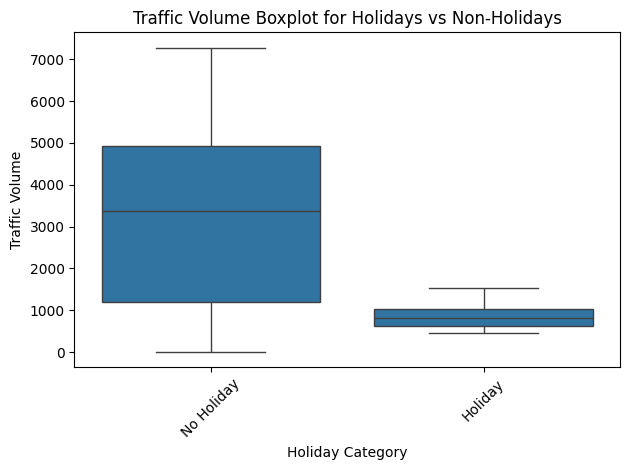

In [16]:
df['holiday'] = df['holiday'].apply(lambda x: 'No Holiday' if x=='No Holiday' else 'Holiday')
sns.boxplot(x='holiday', y='traffic_volume', data=df)

# Customize the plot
plt.title('Traffic Volume Boxplot for Holidays vs Non-Holidays')
plt.xlabel('Holiday Category')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
print(df.describe())

       traffic_volume          temp       rain_1h       snow_1h    clouds_all  \
count    48204.000000  48204.000000  48204.000000  48204.000000  48204.000000   
mean      3259.818355     46.500567      0.334264      0.000222     49.362231   
std       1986.860670     24.008817     44.789133      0.008168     39.015750   
min          0.000000   -459.670000      0.000000      0.000000      0.000000   
25%       1193.000000     30.218000      0.000000      0.000000      1.000000   
50%       3380.000000     48.740000      0.000000      0.000000     64.000000   
75%       4933.000000     65.580800      0.000000      0.000000     90.000000   
max       7280.000000     98.456000   9831.300000      0.510000    100.000000   

              month          year          hour  
count  48204.000000  48204.000000  48204.000000  
mean       6.537715   2015.512426     11.398162  
std        3.413871      1.893211      6.940238  
min        1.000000   2012.000000      0.000000  
25%        4.000000 

Skipping boxplot for non-numerical column: holiday
Skipping boxplot for non-numerical column: weather_main
Skipping boxplot for non-numerical column: weather_description
Skipping boxplot for non-numerical column: day


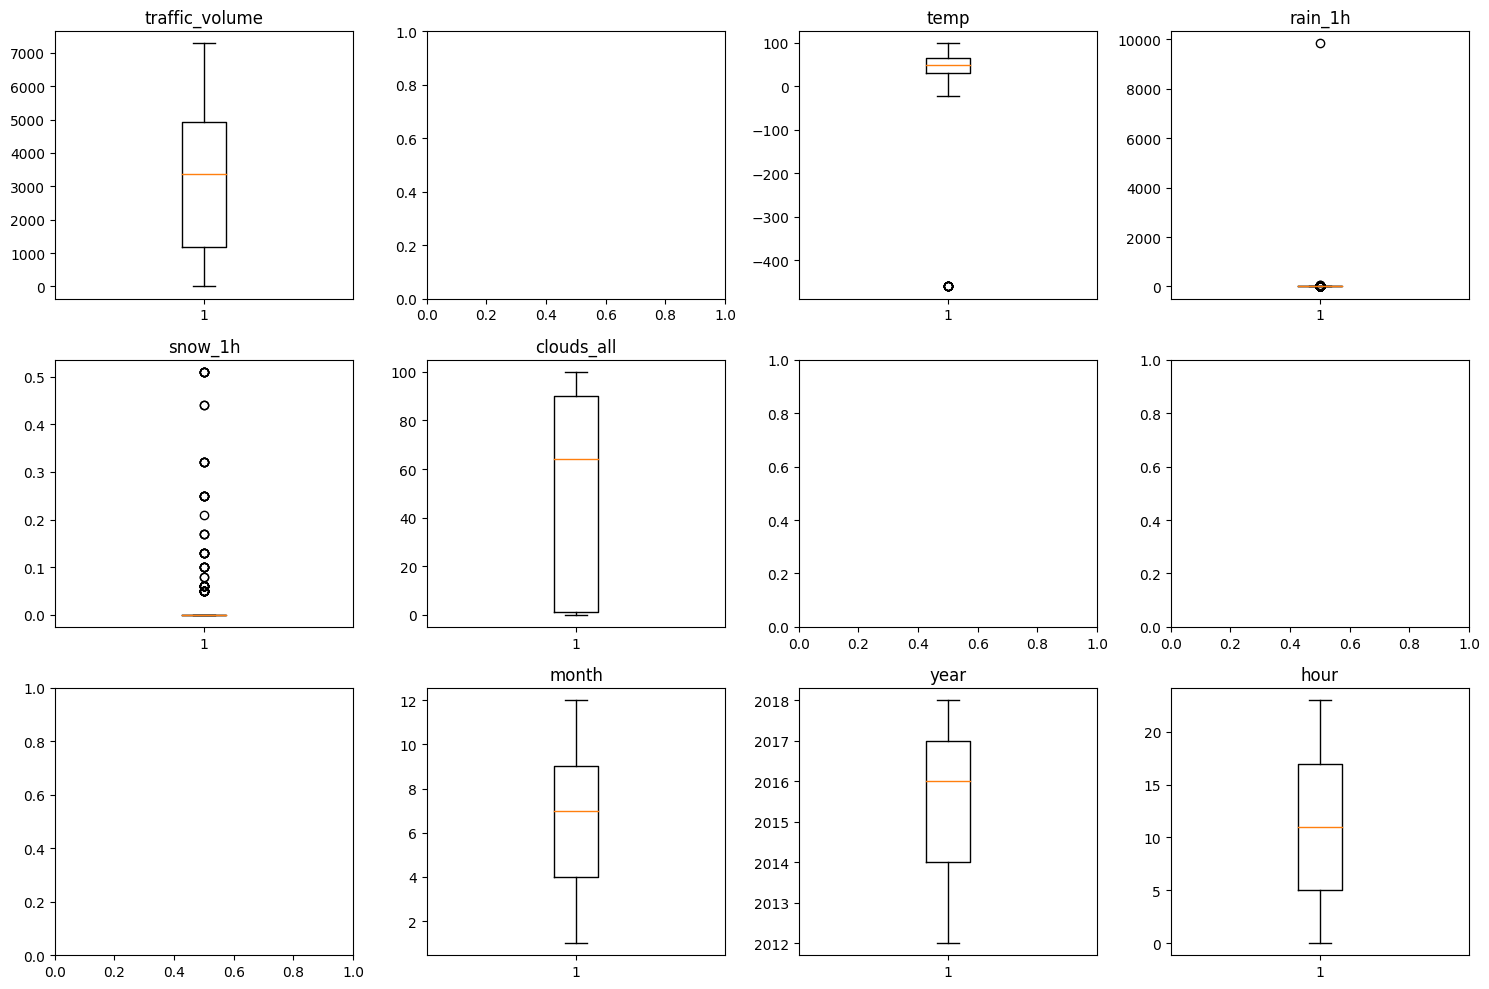

In [18]:
# Create a figure and axes
fig, axes = plt.subplots(nrows=int(len(df.columns) / 4), ncols=4, figsize=(15, 10))

# Iterate over each column (feature)
for i, column in enumerate(df.columns):
    row = i // 4
    col = i % 4

    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(df[column]):
        axes[row, col].boxplot(df[column])
        axes[row, col].set_title(column)
    else:
        # Handle non-numerical columns (e.g., categorical)
        # You could skip them or use a different visualization
        print(f"Skipping boxplot for non-numerical column: {column}")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

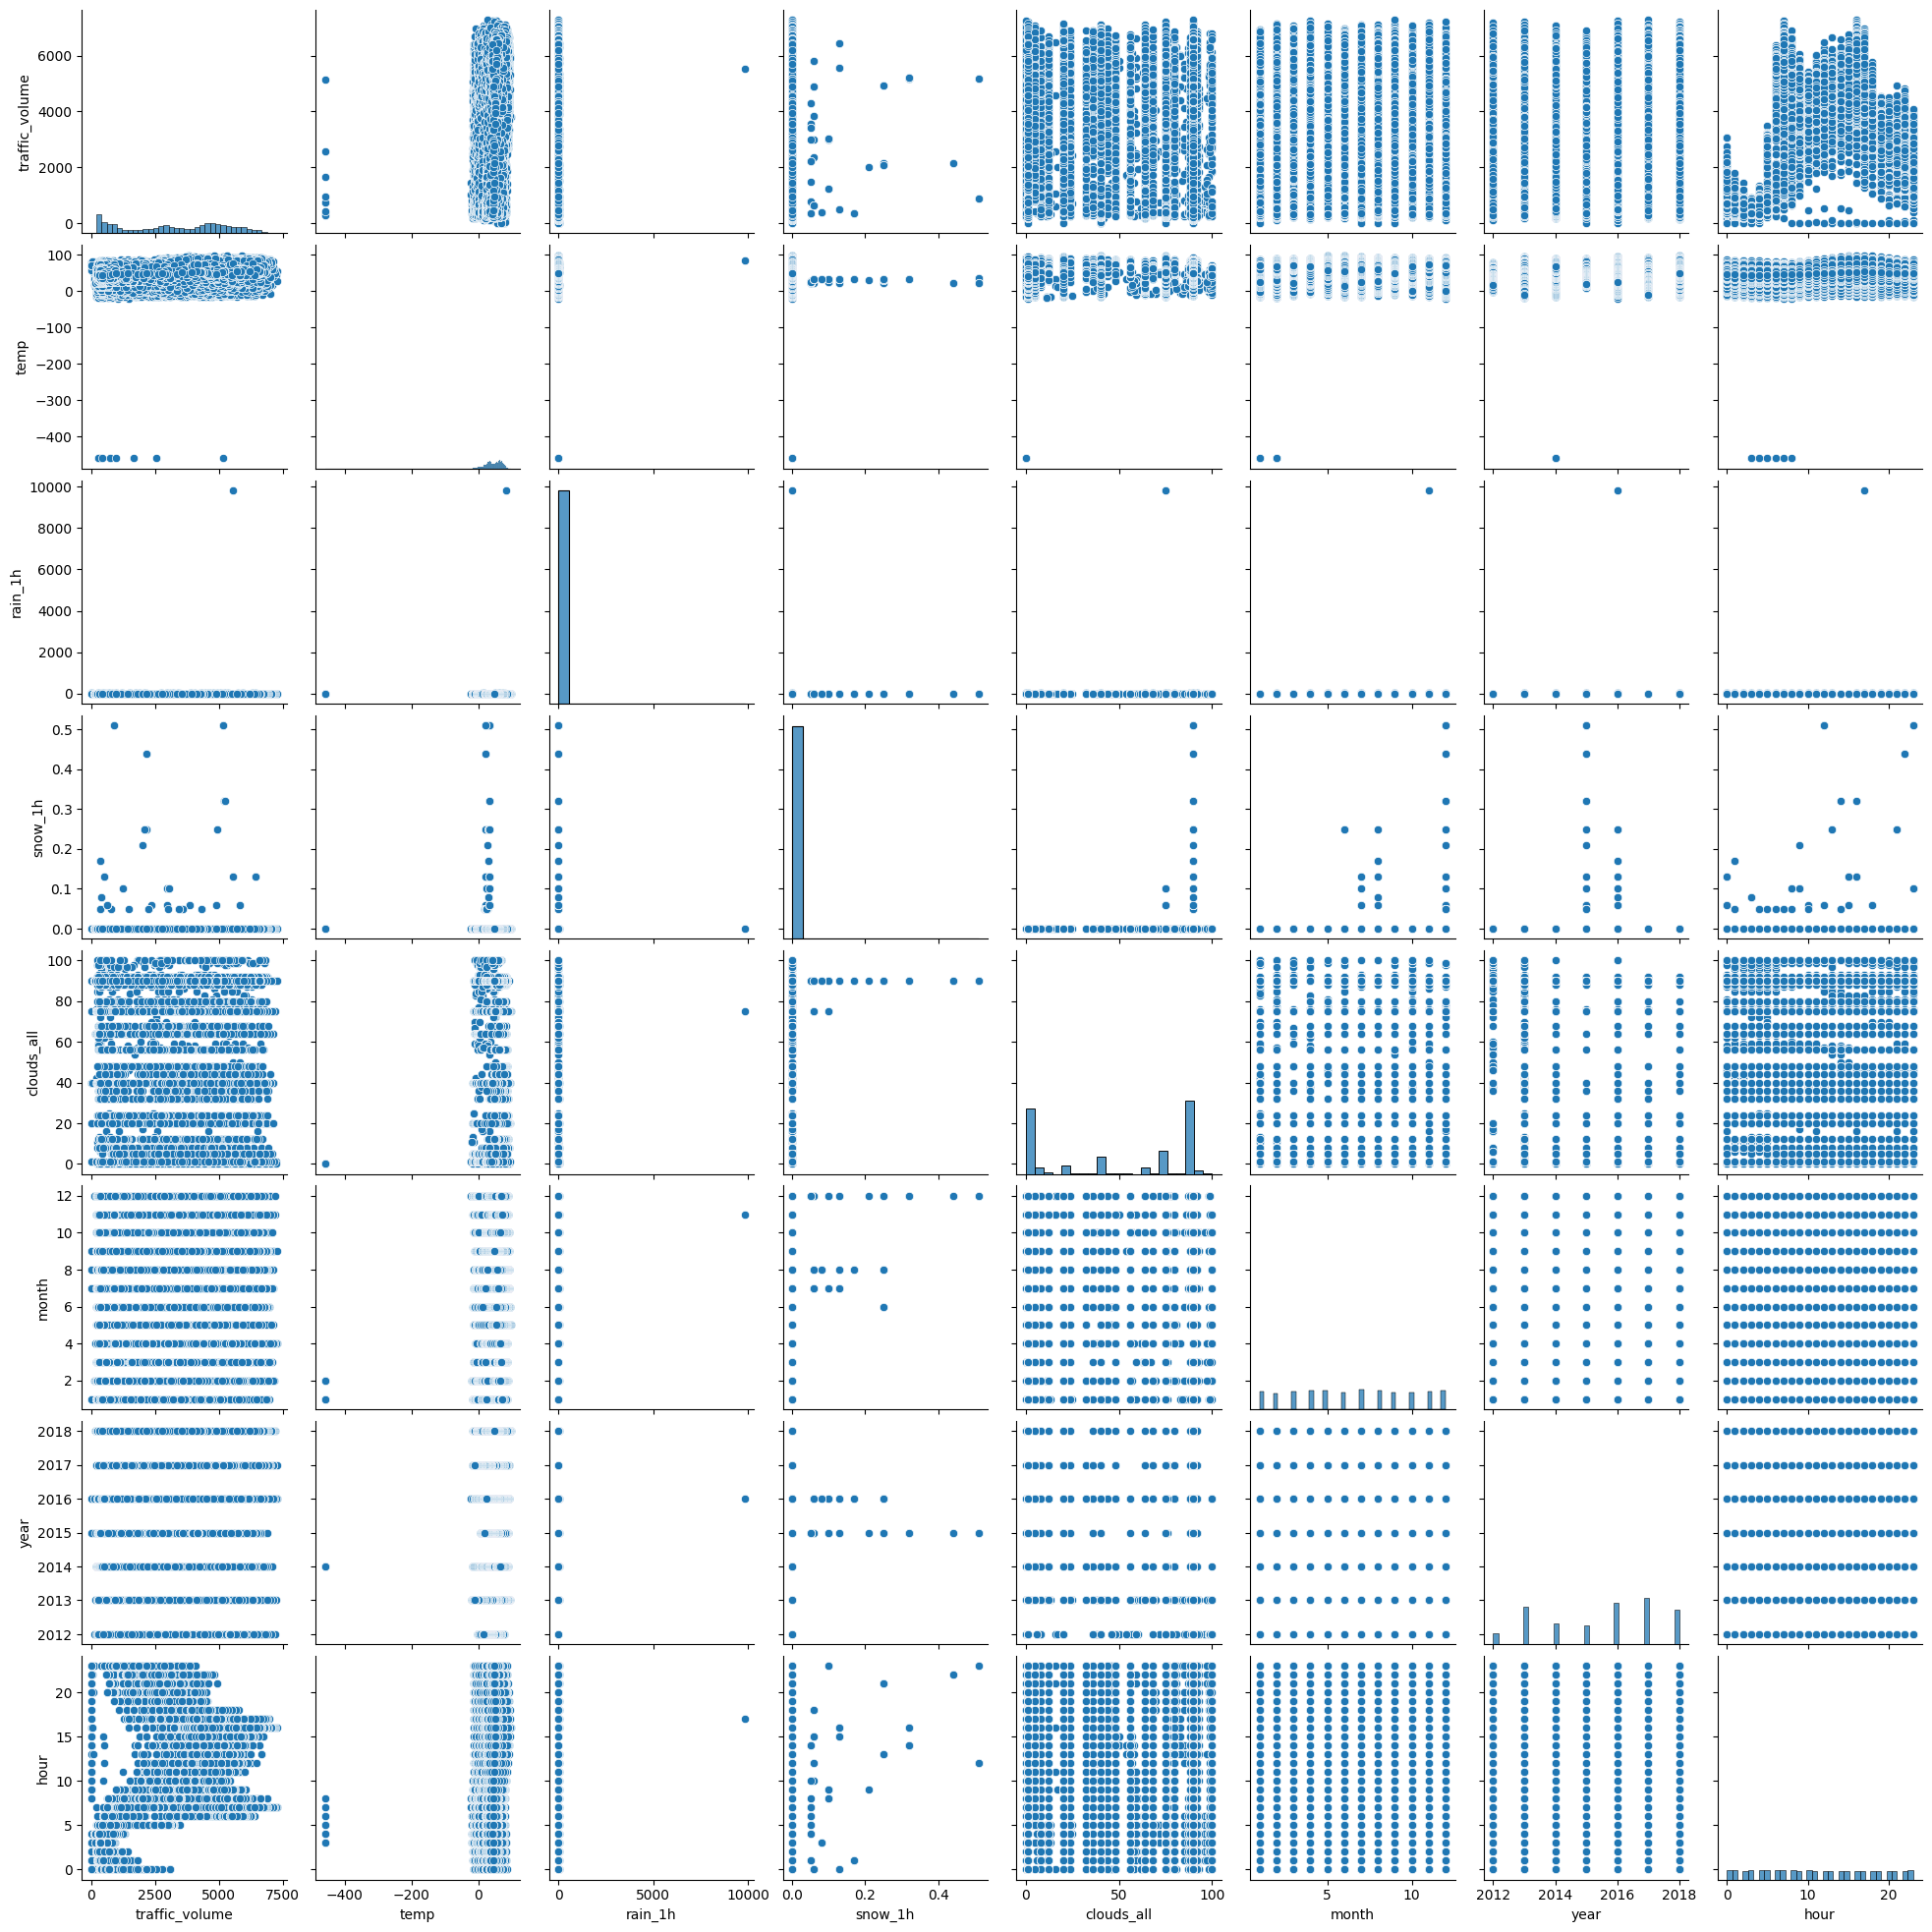

In [19]:
sns.pairplot(df)

# Show the plot
plt.show()

In [20]:
print(df['temp'].value_counts().sort_index())
print(df['rain_1h'].value_counts().sort_index())
print(df['snow_1h'].value_counts().sort_index())

temp
-459.670    10
-21.568      1
-21.154      1
-20.074      1
-18.994      3
            ..
 96.296      1
 96.440      1
 96.674      1
 97.052      1
 98.456      1
Name: count, Length: 5843, dtype: int64
rain_1h
0.00       44737
0.25         948
0.26           2
0.27           5
0.28          23
           ...  
28.70          2
31.75          1
44.45          1
55.63          1
9831.30        1
Name: count, Length: 372, dtype: int64
snow_1h
0.00    48141
0.05       14
0.06       12
0.08        2
0.10        6
0.13        6
0.17        3
0.21        1
0.25        6
0.32        5
0.44        2
0.51        6
Name: count, dtype: int64


In [21]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,month,year,hour
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,46.500567,0.334264,0.000222,49.362231,6.537715,2015.512426,11.398162
std,1986.860670,24.008817,44.789133,0.008168,39.015750,3.413871,1.893211,6.940238
min,0.000000,-459.670000,0.000000,0.000000,0.000000,1.000000,2012.000000,0.000000
25%,1193.000000,30.218000,0.000000,0.000000,1.000000,4.000000,2014.000000,5.000000
50%,3380.000000,48.740000,0.000000,0.000000,64.000000,7.000000,2016.000000,11.000000
75%,4933.000000,65.580800,0.000000,0.000000,90.000000,9.000000,2017.000000,17.000000
max,7280.000000,98.456000,9831.300000,0.510000,100.000000,12.000000,2018.000000,23.000000


#Removing Handliers

In [22]:
print(df.shape)
#drop the rows which has temp=0
rows_to_drop = df[df['temp'] < -50].index
print(len(rows_to_drop))
df = df.drop(rows_to_drop)
print(df.shape)

(48204, 12)
10
(48194, 12)


In [23]:
#drop the rows which has rain>75
rows_to_drop = df[df['rain_1h'] >75].index
print(len(rows_to_drop))
df = df.drop(rows_to_drop)
print(df.shape)

1
(48193, 12)


In [24]:
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day,month,year,hour
0,5545,No Holiday,59.234,0.0,0.0,40,Clouds,scattered clouds,Friday,2,2012,9
1,4516,No Holiday,61.178,0.0,0.0,75,Clouds,broken clouds,Friday,2,2012,10
2,4767,No Holiday,61.574,0.0,0.0,90,Clouds,overcast clouds,Friday,2,2012,11
3,5026,No Holiday,62.564,0.0,0.0,90,Clouds,overcast clouds,Friday,2,2012,12
4,4918,No Holiday,64.382,0.0,0.0,75,Clouds,broken clouds,Friday,2,2012,13


<Axes: >

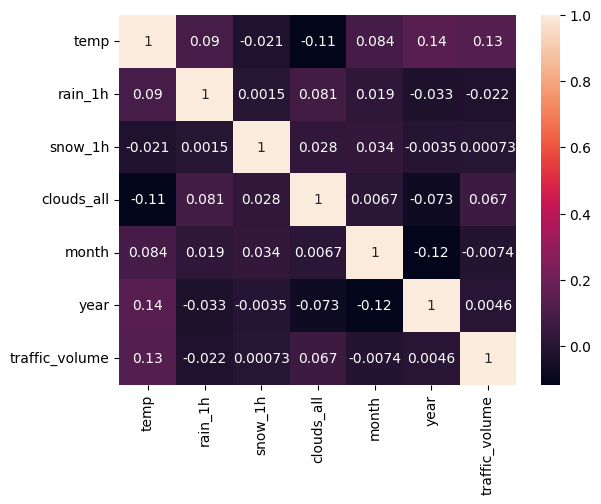

In [25]:
df_weather=df[['temp', 'rain_1h', 'snow_1h', 'clouds_all','month','year','traffic_volume']]
#print(df_weather.head())
sns.heatmap(df_weather.corr(), annot=True)

In [26]:
df.drop(['weather_description'],axis=1,inplace=True)
x_df=df.drop(['traffic_volume'],axis=1)
y_df=df['traffic_volume']


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48193 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   traffic_volume  48193 non-null  int64  
 1   holiday         48193 non-null  object 
 2   temp            48193 non-null  float64
 3   rain_1h         48193 non-null  float64
 4   snow_1h         48193 non-null  float64
 5   clouds_all      48193 non-null  int64  
 6   weather_main    48193 non-null  object 
 7   day             48193 non-null  object 
 8   month           48193 non-null  int32  
 9   year            48193 non-null  int32  
 10  hour            48193 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(3)
memory usage: 3.9+ MB


In [28]:
label_encoder = LabelEncoder()

df['weather_main'] = label_encoder.fit_transform(df['weather_main'])
df['day'] = label_encoder.fit_transform(df['day'])
df['holiday'] = label_encoder.fit_transform(df['holiday'])

# Display the label mappings for each feature
'''weather_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
day_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
holiday_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))'''

'weather_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))\nday_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))\nholiday_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))'

In [29]:
print(df.head())
print(df.info())

   traffic_volume  holiday    temp  rain_1h  snow_1h  clouds_all  \
0            5545        1  59.234      0.0      0.0          40   
1            4516        1  61.178      0.0      0.0          75   
2            4767        1  61.574      0.0      0.0          90   
3            5026        1  62.564      0.0      0.0          90   
4            4918        1  64.382      0.0      0.0          75   

   weather_main  day  month  year  hour  
0             1    0      2  2012     9  
1             1    0      2  2012    10  
2             1    0      2  2012    11  
3             1    0      2  2012    12  
4             1    0      2  2012    13  
<class 'pandas.core.frame.DataFrame'>
Index: 48193 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   traffic_volume  48193 non-null  int64  
 1   holiday         48193 non-null  int64  
 2   temp            48193 non-null  float64
 3   rain_

In [30]:
x_df=df.drop(['traffic_volume'],axis=1)
y_df=df['traffic_volume']


In [31]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_df)  # Fit and transform the features

# Initialize and fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_df, y_df)
# Print the model coefficients
intercept = lr_model.intercept_
coefficients = lr_model.coef_

print("Intercept:", intercept)
print("Model Coefficients:", coefficients)

equation = f"y = {intercept:.2f}"

# Loop through the coefficients and features to build the equation
for i, coef in enumerate(coefficients):
    equation += f" + ({coef:.2f}) * X_{i+1}"  # X_{i+1} represents the feature index

# Print the linear equation
print("Linear Regression Equation:")
print(equation)

Intercept: 2743.305778765025
Model Coefficients: [ 1.22959350e+03  9.23949025e+00 -4.88109442e+01 -8.13365770e+01
  4.71659266e+00 -4.24721957e+01  2.60936638e+01 -9.02657092e+00
 -1.16893042e+00  9.45782368e+01]
Linear Regression Equation:
y = 2743.31 + (1229.59) * X_1 + (9.24) * X_2 + (-48.81) * X_3 + (-81.34) * X_4 + (4.72) * X_5 + (-42.47) * X_6 + (26.09) * X_7 + (-9.03) * X_8 + (-1.17) * X_9 + (94.58) * X_10


In [32]:
df.head(20)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,day,month,year,hour
0,5545,1,59.234,0.0,0.0,40,1,0,2,2012,9
1,4516,1,61.178,0.0,0.0,75,1,0,2,2012,10
2,4767,1,61.574,0.0,0.0,90,1,0,2,2012,11
3,5026,1,62.564,0.0,0.0,90,1,0,2,2012,12
4,4918,1,64.382,0.0,0.0,75,1,0,2,2012,13
5,5181,1,65.426,0.0,0.0,1,0,0,2,2012,14
6,5584,1,68.036,0.0,0.0,1,0,0,2,2012,15
7,6015,1,69.278,0.0,0.0,1,0,0,2,2012,16
8,5791,1,69.782,0.0,0.0,20,1,0,2,2012,17
9,4770,1,67.910,0.0,0.0,20,1,0,2,2012,18
